# 房價預測模型
---
模型04 - Dropout

使用Kaggle資料集預測房屋價格

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.shape

pd.options.display.max_columns = 25
data.head()

# data.dtypes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data["year"] = pd.to_numeric(data["date"].str.slice(0, 4))
data["month"] = pd.to_numeric(data["date"].str.slice(4, 6))
data["day"] = pd.to_numeric(data["date"].str.slice(6, 8))

data.drop(["id"], axis=1, inplace=True)
data.drop(["date"], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [4]:
data_num = data.shape[0]
indexs = np.random.permutation(data_num)

train_indexs = indexs[:int(data_num*0.6)]
val_indexs = indexs[int(data_num*0.6):int(data_num*0.8)]
test_indexs = indexs[int(data_num*0.8):]

train_data = data.loc[train_indexs]
val_data = data.loc[val_indexs]
test_data = data.loc[test_indexs]

train_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
4031,276000.0,3,1.5,1820,8750,1.0,0,0,4,7,1200,620,1958,0,98198,47.4213,-122.322,1500,8000,2014,12,23
402,352000.0,2,1.0,940,5000,1.0,0,0,4,7,940,0,1937,0,98117,47.6879,-122.385,1560,4500,2015,4,22
14023,506000.0,3,2.0,1160,6120,1.0,0,0,3,7,1160,0,1947,0,98115,47.6853,-122.293,1150,5100,2015,5,6
8548,330000.0,4,2.5,2310,6320,2.0,0,0,3,8,2310,0,1997,0,98092,47.3287,-122.167,1850,6181,2015,3,17
1029,543115.0,2,1.0,1380,5484,1.0,0,0,3,8,1030,350,1947,0,98199,47.6382,-122.399,1380,5347,2015,3,5


In [5]:
mean = train_data.mean()
std = train_data.std()
train_data = (train_data - mean) / std

mean = val_data.mean()
std = val_data.std()
val_data = (val_data - mean) / std

# val_data.mean()
# val_data.std()

In [6]:
x_train = np.array(train_data.drop("price", axis=1))
y_train = np.array(train_data["price"])
x_val = np.array(val_data.drop("price", axis=1))
y_val = np.array(val_data["price"])

print(x_val.shape)
print(y_val.shape)

(4323, 21)
(4323,)


In [7]:
model = keras.Sequential(name="model-4")

model.add(layers.Dense(64, activation="relu", input_shape=(21, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

print(model.summary())

Model: "model-4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(keras.optimizers.Adam(0.001), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanAbsoluteError()])

In [9]:
model_dir = "logs/models/"
if not os.path.exists(model_dir):
    print("new dir!")
    os.makedirs(model_dir)

log_dir = os.path.join("logs", "model-4")
model_cdk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+"best-model-4.h5", monitor="val_mean_absolute_error", 
                                             save_best_only=True, mode="min")

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100,
                    validation_data=(x_val, y_val), callbacks=[model_cdk, model_mckp])

Epoch 1/100
203/203 [==============================] - 3s 10ms/step - loss: 0.4202 - mean_absolute_error: 0.4207 - val_loss: 0.2551 - val_mean_absolute_error: 0.3129
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2843 - mean_absolute_error: 0.3383 - val_loss: 0.2317 - val_mean_absolute_error: 0.3037
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2679 - mean_absolute_error: 0.3170 - val_loss: 0.2257 - val_mean_absolute_error: 0.2922
Epoch 4/100
203/203 [==============================] - 1s 7ms/step - loss: 0.2397 - mean_absolute_error: 0.3001 - val_loss: 0.2204 - val_mean_absolute_error: 0.2963
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2164 - mean_absolute_error: 0.2926 - val_loss: 0.2117 - val_mean_absolute_error: 0.2888
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2139 - mean_absolute_error: 0.2824 - val_loss: 0.1862 - val_mean_absolute_error: 0.2668
Epoch 7/1

203/203 [==============================] - 1s 5ms/step - loss: 0.1135 - mean_absolute_error: 0.2137 - val_loss: 0.1320 - val_mean_absolute_error: 0.2236
Epoch 51/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1100 - mean_absolute_error: 0.2134 - val_loss: 0.1370 - val_mean_absolute_error: 0.2343
Epoch 52/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1104 - mean_absolute_error: 0.2131 - val_loss: 0.1474 - val_mean_absolute_error: 0.2382
Epoch 53/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1071 - mean_absolute_error: 0.2127 - val_loss: 0.1226 - val_mean_absolute_error: 0.2197
Epoch 54/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1159 - mean_absolute_error: 0.2138 - val_loss: 0.1327 - val_mean_absolute_error: 0.2244
Epoch 55/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1076 - mean_absolute_error: 0.2105 - val_loss: 0.1391 - val_mean_absolute_error: 0.2291
Epoch 56/100
203/

203/203 [==============================] - 1s 5ms/step - loss: 0.1037 - mean_absolute_error: 0.2032 - val_loss: 0.1256 - val_mean_absolute_error: 0.2229
Epoch 100/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0982 - mean_absolute_error: 0.2020 - val_loss: 0.1319 - val_mean_absolute_error: 0.2217


Text(0.5, 1.0, 'MSE')

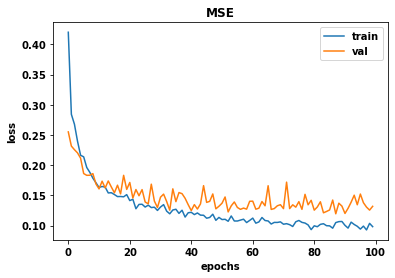

In [11]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc="upper right")
plt.title('MSE')

Text(0.5, 1.0, 'MAE')

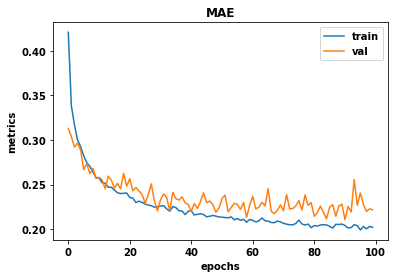

In [12]:
plt.plot(history.history["mean_absolute_error"], label="train")
plt.plot(history.history["val_mean_absolute_error"], label="val")
plt.xlabel("epochs")
plt.ylabel("metrics")
plt.legend(loc="upper right")
plt.title('MAE')

In [13]:
model.load_weights("logs/models/best-model-4.h5")

y_test = np.array(test_data["price"])
mean = test_data.mean()
std = test_data.std()
test_data = (test_data - mean) / std
x_test = np.array(test_data.drop("price", axis=1))

y_pred = model.predict(x_test)

y_pred = np.reshape(y_pred * std["price"] + mean["price"], y_test.shape)
precentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100

print("Model precentage error: {:.2f}%".format(precentage_error))

Model precentage error: 13.11%


In [14]:
# %load_ext tensorboard
# %tensorboard --logdir logs

In [15]:
# %reload_ext tensorboard